# CME 502 Final Project
## Melanie Brito

In [1]:
import numpy as np

Throughout the code 1 represents BCC Fe and 2 represents BCC Mg

# Effective Bulk and Shear Modulus

All modulus values are in GPa

Make an array for the bulk (kpure) and shear (upure) moduli for pure Fe and pure Mg <br>
These values are from literature

Make an array for the different compositions (at% of Mg) (x)

Preallocate arrays for the values of the effective bulk (ek) and shear (eu) moduli for each composition

Make functions for the equations used to find the effective bulk and shear moduli (efbulk and efshear respectively)

A loop is made that goes over the different Mg compositions

The shear modulus equation must be solved for the value of the shear modulus which is u. <br>
To do this, different potential values of shear modulus are looped through and when the solution to the equation changes from positive to negative (meaning it passed through 0), this is the value of the effective shear modulus.

Once the effective shear modulus is found, it can be used in the equation to find the effective bulk modulus.

The values for the effective moduli for each composition are stored in an array and also printed into a text file "Effective Moduli.txt"

Equation for the effective shear modulus
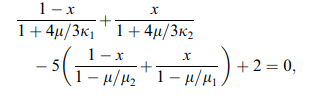

Equation for the effective bulk modulus
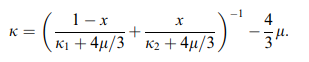

The Equations used in this part are from the Lattice Parameter anaylsis on binary alloys by Lubarda et al.

In [2]:
#Make arrays for the bulk(k) and shear(u) moduli of each of the pure components (values from literature in GPa)
#Index 0 is for Fe and index 1 is for Mg
upure=np.array([81.4,19.5],float)
kpure=np.array([169.6,180.2],float)

#Make an array for the different concentrations
x=np.array([0.01,0.05,0.1,0.15,0.2],float)

#Make arrays to store the effective moduli as they are found
eu=np.zeros(len(x))
ek=np.zeros(len(x))

#Make 2 functions, one to solve for the effective shear modulus and one to solve for the effective bulk modulus
def efshear(x,u):
    y=((1-x)/(1+(4*u/3*kpure[0])))+((x)/(1+(4*u/3*kpure[1])))-5*(((1-x)/(1-(u/upure[1])))+((x)/(1-(u/upure[0]))))+2
    return y

def efbulk(x,u):
    k=(((1-x)/(kpure[0]+(4*u/3)))+((x)/(kpure[1]+(4*u/3))))**(-1)-(4/3*u)
    return k


#Loop through the different concentrations
for i in range(len(x)):
    #Need to find where the function for the effective shear modulus equation equals 0
    #Loop through potential values of u and then break the loop when the output of the function changes from pos to neg
    #The value before where the loop breaks is the effective shear modulus
    j=50
    while j<100:
        y=efshear(x[i],j)
        if y<0:
            eu[i]=j-.01
            break
        j=j+0.01
    #Now that the effective shear modulus has been found, the effective bulk modulus can be found
    ek[i]=efbulk(x[i],eu[i])

#Print the arrays
for i in range(len(x)):
    print("Mg composition: {:1.2f}\nEffective Bulk Modulus: {:1.2f}\nEffective Shear Modulus: {:1.2f}\n\n".format(x[i],ek[i],eu[i]))

#Write the arrays to a text file
with open("Effective Moduli.txt", 'w') as f:
    f.write("x     Effective Shear Modulus (GPa)    Effective Bulk Modulus (GPa)\n")
    for i in range(len(x)):
        f.write("{:.2f} {:12.2f} {:32.2f}\n".format(x[i],eu[i],ek[i]))

Mg composition: 0.01
Effective Bulk Modulus: 169.70
Effective Shear Modulus: 80.26


Mg composition: 0.05
Effective Bulk Modulus: 170.11
Effective Shear Modulus: 75.81


Mg composition: 0.10
Effective Bulk Modulus: 170.62
Effective Shear Modulus: 70.46


Mg composition: 0.15
Effective Bulk Modulus: 171.14
Effective Shear Modulus: 65.36


Mg composition: 0.20
Effective Bulk Modulus: 171.65
Effective Shear Modulus: 60.53




# Compositional Effect

Make an array for the literature values of Lattice Parameter for BCC Fe and BCC Mg (alit), index 0 is Fe and index 1 is Mg

There are also several other constants used in the equations. These are <br>
v: Parameter representing the crystal structure of the lattice (1 for BCC lattices) <br>
k: Number of atoms per unit cell (2 for BCC) <br>
gamma1, gamma2: Having to do with the bulk and shear moduli of the pure compoments <br>
R1,R2: Seitz atomic radius of BCC Fe and BCC Mg respectively <br>
C: Having to do with the relationship between gamma and Seitz Radius

Preallocate the arrays for the lattice paramter due to compositional effects (acomp) and the change in LP due to compositional effects (delacomp)

Loop through the different compositions <br>
Another constant, gamma, is calculated inside the loop because it uses the effective bulk and shear moduli <br>
acomp and delacomp are calculated and saved into the arrays

acomp and delacomp are saved to a text file "Compositional Effects.txt"

The equations for the lattice parameter and all the constants are from Lattice Parameter analysis on binary alloys by Lubarda et al.

Equation for acomp
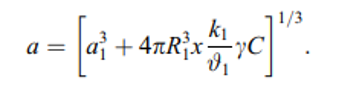

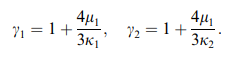


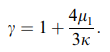

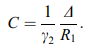

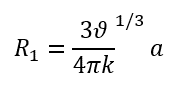

In [3]:
#All Lattice Parameter Values for this part are in Angstrom
#Make an array for the literature values for the lattice paramter of BCC Fe and BCC Mg
#Index 0 is the value for Fe, index 1 is the value for Mg
alit=np.array([2.86,3.55],float)

#Next we enter needed parameters that dont change with composition
v=1 #Cubic lattices 
k=2 #Number of atoms per unit lattice cell (2 for BCC)
gamma1=1+((4*upure[0])/(3*kpure[0]))
gamma2=1+((4*upure[0])/(3*kpure[1]))
#Gamma changes with each composition so we preallocate it and calculate it inside the loop
gamma=np.zeros(len(x))

#Next we find the Seitz atomic radius, which does not vary with composition, for the BCC Fe and the BCC Mg
R1=(((3*v)/(4*np.pi*k))**(1/3))*alit[0]
R2=(((3*v)/(4*np.pi*k))**(1/3))*alit[1]

#We also need the parameter C, which depends on the Seitz radii and gamma
C=(1/gamma2)*((R2-R1)/R1)

#Preallocate the arrays for the lattice parameter and the change in the lattice parameter
acomp=np.zeros(len(x))
delacomp=np.zeros(len(x))

#Loop through the concentrations to find the modified lattice parameter due to compositional effects and the change in lattice parameter
for i in range(len(x)):
    #Gamma changes with each composition so it is calculated inside the loop
    gamma[i]=1+((4*upure[0])/(3*ek[i]))
    #Calculate the lattice parameter (call all the necessary values)
    acomp[i]=((alit[0]**3)+(4*(np.pi)*(R1**3)*(x[i])*(k/v)*(gamma[i])*C))**(1/3)
    delacomp[i]=acomp[i]-alit[0]

#Print the lattice parameter values
for i in range(len(x)):
    print("Mg composition: {:1.2f}\nLattice Paramter: {:1.8f}\nChange in LP due to comp effects: {:1.8f}\n\n".format(x[i],acomp[i],delacomp[i]))

#Write the lattice parameter values to a text file
with open("Compositional Effects.txt", 'w') as f:
    f.write("x     Lattice Parameter (A)    Change in LP (deltaacomp) (A)\n")
    for i in range(len(x)):
        f.write("{:.2f} {:12.8f} {:32.8f}\n".format(x[i],acomp[i],delacomp[i]))

Mg composition: 0.01
Lattice Paramter: 2.86704309
Change in LP due to comp effects: 0.00704309


Mg composition: 0.05
Lattice Paramter: 2.89484292
Change in LP due to comp effects: 0.03484292


Mg composition: 0.10
Lattice Paramter: 2.92878808
Change in LP due to comp effects: 0.06878808


Mg composition: 0.15
Lattice Paramter: 2.96188768
Change in LP due to comp effects: 0.10188768


Mg composition: 0.20
Lattice Paramter: 2.99418916
Change in LP due to comp effects: 0.13418916




# Grain Size Effect

Interfacial stress and grain boundary thickness will be used in the calculations. Interfacial stress value is obtained from literature and GB thickness is estimated to be 1 nm. These values are saved to varibales stress (N/m) and gbt (nm).

There are experimental values for the grain size from the samples I synthesized or each composition and these are stored in an array (d) to be indexed into. The d values are in nm.

The lattice parameter values from the compositional effects are used as the "starting point" for these calculations. Since their value is in A, it is converted to nm for this part of the calculation since GB thickness and and grain size are in nm. 

The grain size effects are composed of interfacial stress effects (delais) and excess free volume (delefv). Both of these values will be calulated for each compostion so arrays will be preallocated. delags will also be preallocated. The formula for delaefv is long and complicated so it is broken into parts to avoid errors.

Loop through the different compositions and find delais and delaefv (need to index acomp, d and ek)

delaefv and delais are added together to get the delgs

delaefv, delais and delags are saved to a text file "Grain Size Effects.txt"

The equations for lattice parameter change due to interfacial stress and excess free volume are from the analysis on lattice parameter variation with crystallite size by Rane et al.

Equation for delais
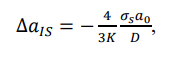

Equation for delaefv
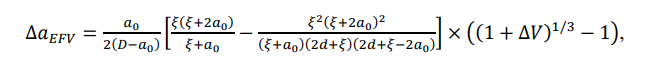

In [4]:
#Lattice parameter values in this part will be calculated in nm

#Make variables for interfacial stress and GB thickness
stress=1.8 #Value of interfacial stress from literature (N/m)
gbt=1  #Estimated (nm)

#Make an array for the experimental values for grain size (nm)
d=np.array([30,45.00,16.82,15.1,20.35],float)

#Convert the LP values from the composition effects to nm so they can be used
acompnm=acomp/10

#Preallocate the arrays that will be needed to store the LP changes
delais=np.zeros(len(x))
delaefv=np.zeros(len(x))
delags=np.zeros(len(x))
EFV1=np.zeros(len(x))
EFV2_1=np.zeros(len(x))
EFV2_2=np.zeros(len(x))
EFV2=np.zeros(len(x))
delV=np.zeros(len(x))
EFV3=np.zeros(len(x))

#Loop through the different concentrations to find the change in LP due to grain size effects
for i in range(len(x)):
    #LP change due to interfacial stress
    delais[i]=-((4/(3*ek[i]))*((stress*acompnm[i])/d[i]))
    #The LP change for excess free volume will be split into components to avoid typos
    EFV1[i]=(acompnm[i])/(2*(d[i]-acompnm[i]))
    EFV2_1[i]=(gbt*(gbt+2*acompnm[i]))/(gbt+acompnm[i])
    EFV2_2[i]=((gbt**2)*((gbt+(2*acompnm[i]))**2))/((gbt+acompnm[i])*((2*d[i])+gbt)*((2*d[i])+gbt-(2*acompnm[i])))
    EFV2[i]=EFV2_1[i]-EFV2_2[i]
    delV[i]=(((d[i]+(gbt/2))**2)-(d[i]**2))/(d[i]**2)
    EFV3[i]=((1+delV[i])**(1/3))-1
    delaefv[i]=EFV1[i]*EFV2[i]*EFV3[i]
    #Total grain size LP change
    delags[i]=delais[i]+delaefv[i]


#Print the lattice parameter change values
for i in range(len(x)):
    print("Mg composition: {:1.2f}\ndelais: {:1.8f}\ndelaefv: {:1.8f}\ndelags: {:1.8f}\n\n".format(x[i],delais[i],delaefv[i],delags[i]))

#Write the lattice parameter values to a text file
with open("Grain Size Effects.txt", 'w') as f:
    f.write("x     delais (nm)       delaefv (nm)       delags (nm)\n")
    for i in range(len(x)):
        f.write("{:.2f} {:12.8f} {:17.8f} {:17.8f}\n".format(x[i],delais[i],delaefv[i],delags[i]))

Mg composition: 0.01
delais: -0.00013516
delaefv: 0.00006534
delags: -0.00006982


Mg composition: 0.05
delais: -0.00009076
delaefv: 0.00002930
delags: -0.00006146


Mg composition: 0.10
delais: -0.00024493
delaefv: 0.00021403
delags: -0.00003089


Mg composition: 0.15
delais: -0.00027508
delaefv: 0.00026937
delags: -0.00000571


Mg composition: 0.20
delais: -0.00020572
delaefv: 0.00014974
delags: -0.00005599




# Grain Boundary Segregation Effects

I have experimental values for the Lattice Parameter of each of the different composition samples. These are stored in the array aexp.

Loop through the different compositions and index into the arrays for the dela values (delacomp, delags) to find delagbs. alit values for BCC Fe is also used. delags is converted from nm to A so delagbs is calculated in A.

All the dela values are saved into a text file "Grain Boundary Segregation.txt"

The formula for delgbs is as follows
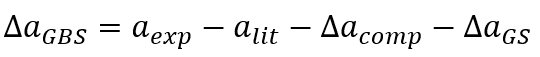

In [5]:
#Lattice Parameter values in Angstrom
#Make an array for the experimental values of the lattice parameter (A)
#aexp=np.array([2.866,2.8665,2.867,2.868,2.869],float)
aexp=np.array([2.866,2.8660188,2.8665838,2.8664856,2.8660052],float)

#Preallocate an array for the change in lattice parameter due to grain boundary segregation
delagbs=np.zeros(len(x))

#Loop throught the different compositions
for i in range(len(x)):
    delagbs[i]=aexp[i]-alit[0]-delacomp[i]-(delags[i]*10)
    
#Print the lattice parameter change values
for i in range(len(x)):
    print("Mg composition: {:1.2f}\ndelagbs: {:1.8f}\n\n".format(x[i],delagbs[i]))

#Write the lattice parameter change values to a text file
with open("Grain Boundary Segregation.txt", 'w') as f:
    f.write("x       aexp (A)       alit (A)    delacomp (A)     delags (A)      delagbs (A)\n")
    for i in range(len(x)):
        f.write("{:.2f} {:10.6f} {:12.2f} {:15.8f} {:15.8f} {:15.8f}\n".format(x[i],aexp[i],alit[0],delacomp[i],delags[i],delagbs[i]))

Mg composition: 0.01
delagbs: -0.00034494


Mg composition: 0.05
delagbs: -0.02820957


Mg composition: 0.10
delagbs: -0.06189534


Mg composition: 0.15
delagbs: -0.09534498


Mg composition: 0.20
delagbs: -0.12762409




# Plotting

Make a plot of Lattice Parameter (A) vs Composition (at% Mg) that has a line for each of the following: <br>
Experimental <br>
Vegards law <br>
Compositional Effects <br>
Grain Size Effects <br>
Grain Boundary Segregation Effects <br>

Vergards Law is another more basic way to account for composition effects and this is used as a comparison to the calculations done here

The formula for Vegards Law is as follows
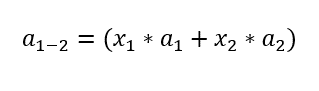
where x is the atomic fraction and 1 represents Fe nad 2 represents Mg

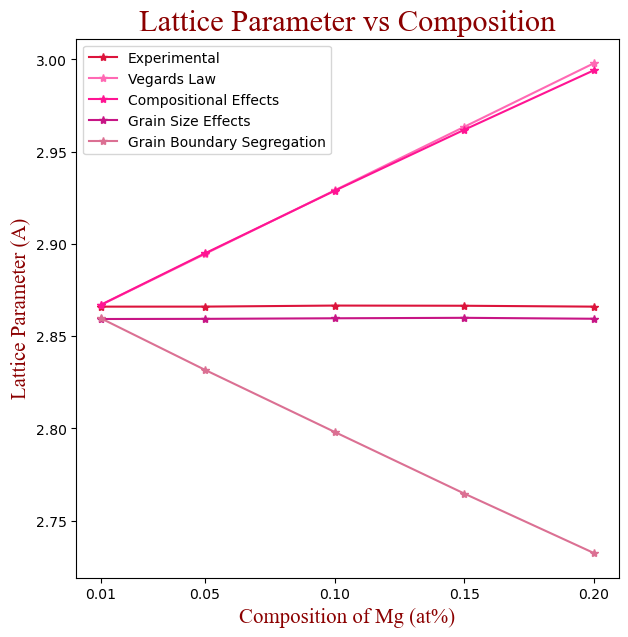

In [6]:
#Make a plot to see how each one of the effects contributes to the overall change in the Lattice Parameter
#The plot will have lines for 
#Experimental values
#Vegards Law
#Composition Effects
#Grain Size Effects
#Grain Boundary Segregtion Effects

#One of the lines on the plot will be Vegards law 
#We loop through all the compositions to find the LP using Vegards Law
aveg=np.zeros(len(x))
for i in range(len(x)):
    aveg[i]=(x[i]*alit[1])+((1-x[i])*alit[0])

#Add the delags to the literature value for Lattice Parameter to get ags (LP just from grain size effects)
ags=np.zeros(len(x))
ags=delags*10+alit[0]

#Add the delagbs to the literature value for Lattice Parameter to get agbs (LP just from grain boundary segregation)
agbs=np.zeros(len(x))
agbs=delagbs+alit[0]

#Plotting
from matplotlib import pyplot as plt
#Make the figure
fig=plt.figure(figsize=(7,7),dpi=100)
#Plot the data
plt.plot(x,aexp,'crimson',marker='*',linestyle='-',label="Experimental")
plt.plot(x,aveg,'hotpink',marker='*',linestyle='-',label="Vegards Law")
plt.plot(x,acomp,'deeppink',marker='*',linestyle='-',label="Compositional Effects")
plt.plot(x,ags,'mediumvioletred',marker='*',linestyle='-',label="Grain Size Effects")
plt.plot(x,agbs,'palevioletred',marker='*',linestyle='-',label="Grain Boundary Segregation")
#Label the plot
plt.xlabel('Composition of Mg (at%)',fontdict={"fontname":"Times New Roman","fontsize":15,"color":"darkred"})
plt.xticks([0.01,0.05,0.1,0.15,0.2])
plt.ylabel('Lattice Parameter (A)',fontdict={"fontname":"Times New Roman","fontsize":15,"color":"darkred"})
plt.title('Lattice Parameter vs Composition',fontdict={"fontname":"Times New Roman","fontsize":22,"color":"darkred"})
plt.legend()

plt.savefig('Lattice Parameter Plot.png', format ='png',dpi=100)

plt.show()

## Curve Fitting

Use the experimental data and fit the line to get it as a function of the composition. <br>
This will be simplified and not take into account many other effects but it will be good to get a general trend of how the lattice parameter changes with the composition.

Since it can be seen from the plot that the trend between LP and Composition is linear, the Linear Regression Model is used. <br>
This model takes the experimental data (the composition and the LP) and gives the straight line equation.

Curvefit can also be used if a linear function is made <br>
The function takes the input of the function, and the exprimental data (the composition and the LP)

The R^2 value and RMS error can also be found for both of the different fits.

The experimental data is plotted along with the 2 fits.

The linear fit is not great so higher order polynomial (2nd, 3rd order) fits are also done to see how this compares.

In [8]:
#Fitting the Experimental data using Linregress
#Import stats so that the linear regression function can be used
from scipy import stats

#Call the function
Lin_reg=stats.linregress(x,aexp)

#Make an array for the fitted data so it can be plotted
linfit=Lin_reg.intercept+(Lin_reg.slope*x)

#Print the output equation
print("Equation for Lattice Parameter as a function of Mg composition using LinearRegression")
print("linfit = {:.2f} + {:.2f}x".format(Lin_reg.intercept,Lin_reg.slope))
print("\n")


#Find the R^2 value
#Residual sum of square (SSE)
res=aexp-linfit
sse=sum(res**2)
#Total Sum of Squares (SST)
sst=sum((aexp-np.mean(aexp))**2)
#Find R^2
R_square=1-(sse/sst)
#Print the R^2 value
print("R2 coefficient of Determinant for LinearRegression:",R_square)
print("\n")

#Find the RMS error
rms_lin=np.sqrt(sum((pow((np.array(linfit)-aexp),2)))/len(x))
#Print RMS value
print("RMS Error value for LinearRegression:",rms_lin)

Equation for Lattice Parameter as a function of Mg composition using LinearRegression
linfit = 2.87 + 0.00x


R2 coefficient of Determinant for LinearRegression: 0.060230285908142056


RMS Error value for LinearRegression: 0.00025201326117060694


In [9]:
#Fitting the Experimental data using Curvefit
#Import the curvefit function
from scipy.optimize import curve_fit

#Make a linear function so that the curvefit function gives a linear fit
def f_lin(x,a0,a1):
    return a0+a1*x

#Curve_fit function gives the coefficients in the par array and the covariance matrix
cfit,cov=curve_fit(f_lin,x,aexp)

#Make an array for the fitted data so it can be plotted
curfit=f_lin(x,*cfit)


#Print the output equation
print("Equation for Lattice Parameter as a function of Mg composition using Curvefit")
print("curfit = {:.2f} + {:.2f}x".format(cfit[0],cfit[1]))
print("\n")


#Find the R^2 value
#Residual sum of square (SSE)
res=aexp-curfit
sse=sum(res**2)
#Total Sum of Squares (SST)
sst=sum((aexp-np.mean(aexp))**2)
#Find R^2
R_square=1-(sse/sst)
#Print the R^2 value
print("R2 coefficient of Determinant for Curvefit",R_square)
print("\n")

#Find the RMS error
rms_cur=np.sqrt(sum((pow((np.array(curfit)-aexp),2)))/len(x))
#Print RMS value
print("RMS Error value for Curvefit:",rms_cur)

Equation for Lattice Parameter as a function of Mg composition using Curvefit
curfit = 2.87 + 0.00x


R2 coefficient of Determinant for Curvefit 0.06023028588285839


RMS Error value for Curvefit: 0.000252013261173997


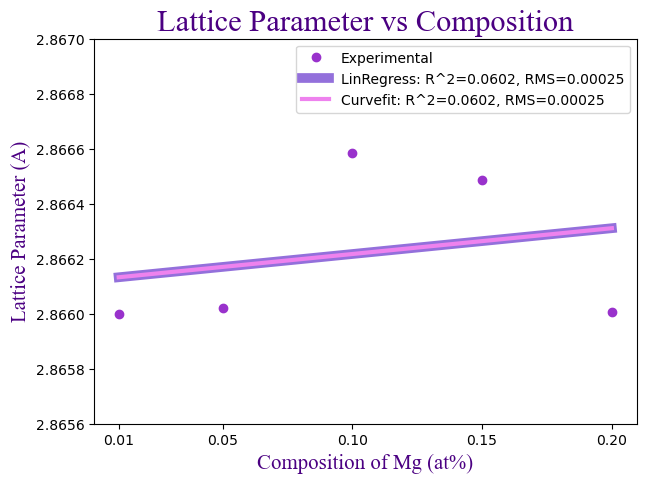

In [10]:
#Plot the Linregress and the Curvefit fit along with the experimental data
#Make the figure
fig=plt.figure(figsize=(7,5),dpi=100)
#Plot the data and the fits
plt.plot(x,aexp,color='darkorchid',marker='o',linestyle='', label="Experimental")
plt.plot(x,linfit,'mediumpurple',linewidth=7, label="LinRegress: R^2=0.0602, RMS=0.00025")
plt.plot(x,curfit,'violet',linewidth=3, label="Curvefit: R^2=0.0602, RMS=0.00025")
#Label the plot
plt.xlabel('Composition of Mg (at%)',fontdict={"fontname":"Times New Roman","fontsize":15,"color":"indigo"})
plt.xticks([0.01,0.05,0.1,0.15,0.2])
plt.ylabel('Lattice Parameter (A)',fontdict={"fontname":"Times New Roman","fontsize":15,"color":"indigo"})
plt.title('Lattice Parameter vs Composition',fontdict={"fontname":"Times New Roman","fontsize":22,"color":"indigo"})
plt.yticks([2.8656,2.8658,2.866,2.8662,2.8664,2.8666,2.8668,2.8670])
plt.legend()

plt.savefig('Curve Fitting Plot.png', format ='png',dpi=100)

plt.show()

Since the linear fit is not very good, higher order polynomial fits are also done to see how thing improves the fit and the R^2

In [11]:
#Fitting the Experimental data using Curvefit (2nd and 3rd order polynomials)
#Import the curvefit function
from scipy.optimize import curve_fit

#Make a 2nd order polynomial function
def f_cur2(x,a0,a1,a2):
    return a0+a1*x+a2*x**2
#Make a 3rd order polynomial function
def f_cur3(x,a0,a1,a2,a3):
    return a0+a1*x+a2*x**2+a3*x**3

#Curve_fit function gives the coefficients in the par array and the covariance matrix
cfit2,cov2=curve_fit(f_cur2,x,aexp)
cfit3,cov3=curve_fit(f_cur3,x,aexp)

#Make an array for the fitted data so it can be plotted
curfit2=f_cur2(x,*cfit2)
curfit3=f_cur3(x,*cfit3)


#Print the output equation (2nd order)
print("Equation for Lattice Parameter as a function of Mg composition using Curvefit 2nd Order")
print("curfit = {:.2f} + {:.2f}x + {:.2f}x^2".format(cfit2[0],cfit2[1],cfit2[2]))
print("\n")

#Find the R^2 value for 2nd Order
#Residual sum of square (SSE)
res2=aexp-curfit2
sse2=sum(res2**2)
#Total Sum of Squares (SST)
sst2=sum((aexp-np.mean(aexp))**2)
#Find R^2
R_square2=1-(sse2/sst2)
#Print the R^2 value
print("R2 coefficient of Determinant for Curvefit 2nd Order",R_square2)

#Find the RMS error for 2nd Order
rms_cur2=np.sqrt(sum((pow((np.array(curfit2)-aexp),2)))/len(x))
#Print RMS value
print("RMS Error value for Curvefit 2nd Order:",rms_cur2)
print("\n")

#Print the output equation (3rd Order)
print("Equation for Lattice Parameter as a function of Mg composition using Curvefit 3rd Order")
print("curfit = {:.2f} + {:.2f}x + {:.2f}x^2 + {:.2f}x^3 ".format(cfit3[0],cfit3[1],cfit3[2],cfit3[3]))
print("\n")

#Find the R^2 value for 3rd Order
#Residual sum of square (SSE)
res3=aexp-curfit3
sse3=sum(res3**2)
#Total Sum of Squares (SST)
sst3=sum((aexp-np.mean(aexp))**2)
#Find R^2
R_square3=1-(sse3/sst3)
#Print the R^2 value
print("R2 coefficient of Determinant for Curvefit 3rd Order",R_square3)

#Find the RMS error for 3rd Order
rms_cur3=np.sqrt(sum((pow((np.array(curfit3)-aexp),2)))/len(x))
#Print RMS value
print("RMS Error value for Curvefit 3rd Order:",rms_cur3)

Equation for Lattice Parameter as a function of Mg composition using Curvefit 2nd Order
curfit = 2.87 + 0.01x + -0.06x^2


R2 coefficient of Determinant for Curvefit 2nd Order 0.7273685227036168
RMS Error value for Curvefit 2nd Order: 0.0001357377575993209


Equation for Lattice Parameter as a function of Mg composition using Curvefit 3rd Order
curfit = 2.87 + -0.00x + 0.13x^2 + -0.60x^3 


R2 coefficient of Determinant for Curvefit 3rd Order 0.9039233998283547
RMS Error value for Curvefit 3rd Order: 8.057892795575019e-05


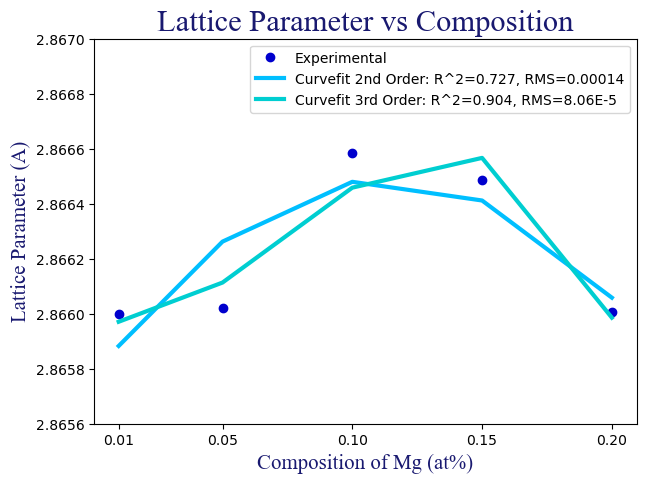

In [22]:
#Plot the Curvefit 2nd and 3rd order fits along with the experimental data
#Make the figure
fig=plt.figure(figsize=(7,5),dpi=100)
#Plot the data and the fits
plt.plot(x,aexp,color='mediumblue',marker='o',linestyle='', label="Experimental")
plt.plot(x,curfit2,'deepskyblue',linewidth=3, label="Curvefit 2nd Order: R^2=0.727, RMS=0.00014")
plt.plot(x,curfit3,'darkturquoise',linewidth=3, label="Curvefit 3rd Order: R^2=0.904, RMS=8.06E-5")
#Label the plot
plt.xlabel('Composition of Mg (at%)',fontdict={"fontname":"Times New Roman","fontsize":15,"color":"midnightblue"})
plt.xticks([0.01,0.05,0.1,0.15,0.2])
plt.ylabel('Lattice Parameter (A)',fontdict={"fontname":"Times New Roman","fontsize":15,"color":"midnightblue"})
plt.title('Lattice Parameter vs Composition',fontdict={"fontname":"Times New Roman","fontsize":22,"color":"midnightblue"})
plt.yticks([2.8656,2.8658,2.866,2.8662,2.8664,2.8666,2.8668,2.8670])
plt.legend()

plt.savefig('Curve Fitting Plot2.png', format ='png',dpi=100)

plt.show()